In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

dataset = pd.read_csv('FIFA22_official_data.csv')
dataset.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [210]:
dataset.columns


Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [187]:
dataset.value_counts(dataset['Value'])

Value
€1.2M      586
€1.1M      560
€1.6M      538
€1.3M      490
€1M        436
          ... 
€125.5M      1
€7K          1
€10K         1
€58.5M       1
€71.5M       1
Name: count, Length: 254, dtype: int64

In [188]:
import re

values = dataset['Value']
float_value = []
float_value = values.str.replace('€','').str.replace('M','').str.replace('K','')
dataset['Value'] = float_value
dataset['Value'] = dataset['Value'].astype(float)
dataset['Value'].describe()

count    16710.000000
mean       213.323166
std        303.418838
min          0.000000
25%          1.800000
50%          6.000000
75%        425.000000
max        975.000000
Name: Value, dtype: float64

In [189]:
dataset.value_counts(dataset['Preferred Foot'])
# dataset['Weak Foot'].describe()

Preferred Foot
Right    12613
Left      4097
Name: count, dtype: int64

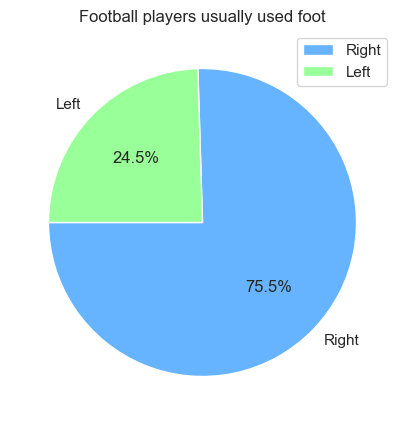

In [190]:
labels = ['Right', 'Left']
values = [12613, 4097]
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=180, colors=['#66b3ff', '#99ff99'])
ax.set_title('Football players usually used foot')
ax.legend(loc="best")
ax.grid(True)
plt.show()

In [ ]:
dataset.value_counts(dataset['Overall'])
# dataset['Overall'].describe()

Overall
67    1103
68    1086
65    1033
69    1002
66     979
70     966
64     930
71     886
63     849
72     813
62     745
73     738
75     585
74     563
61     543
60     501
76     419
59     345
77     333
58     313
78     251
57     220
79     193
56     184
80     156
55     149
81     125
54     101
82      95
53      89
83      68
52      67
51      49
84      45
85      30
50      25
86      24
49      23
87      20
48      14
47      14
89      11
88       9
91       5
90       4
44       2
46       2
92       1
28       1
93       1
Name: count, dtype: int64

In [ ]:
dataset.value_counts(dataset['Potential'])

Potential
72    1242
73    1174
74    1131
71    1121
70    1076
75    1072
69     977
76     977
68     907
67     776
77     761
78     651
66     610
65     561
79     535
80     499
64     384
81     364
82     325
63     286
83     226
62     217
84     163
85     122
61     111
86      89
60      81
87      57
88      40
59      35
89      30
58      24
57      18
90      15
91      11
56      10
92       6
54       5
55       5
93       4
52       3
49       2
51       2
38       1
46       1
53       1
47       1
95       1
Name: count, dtype: int64

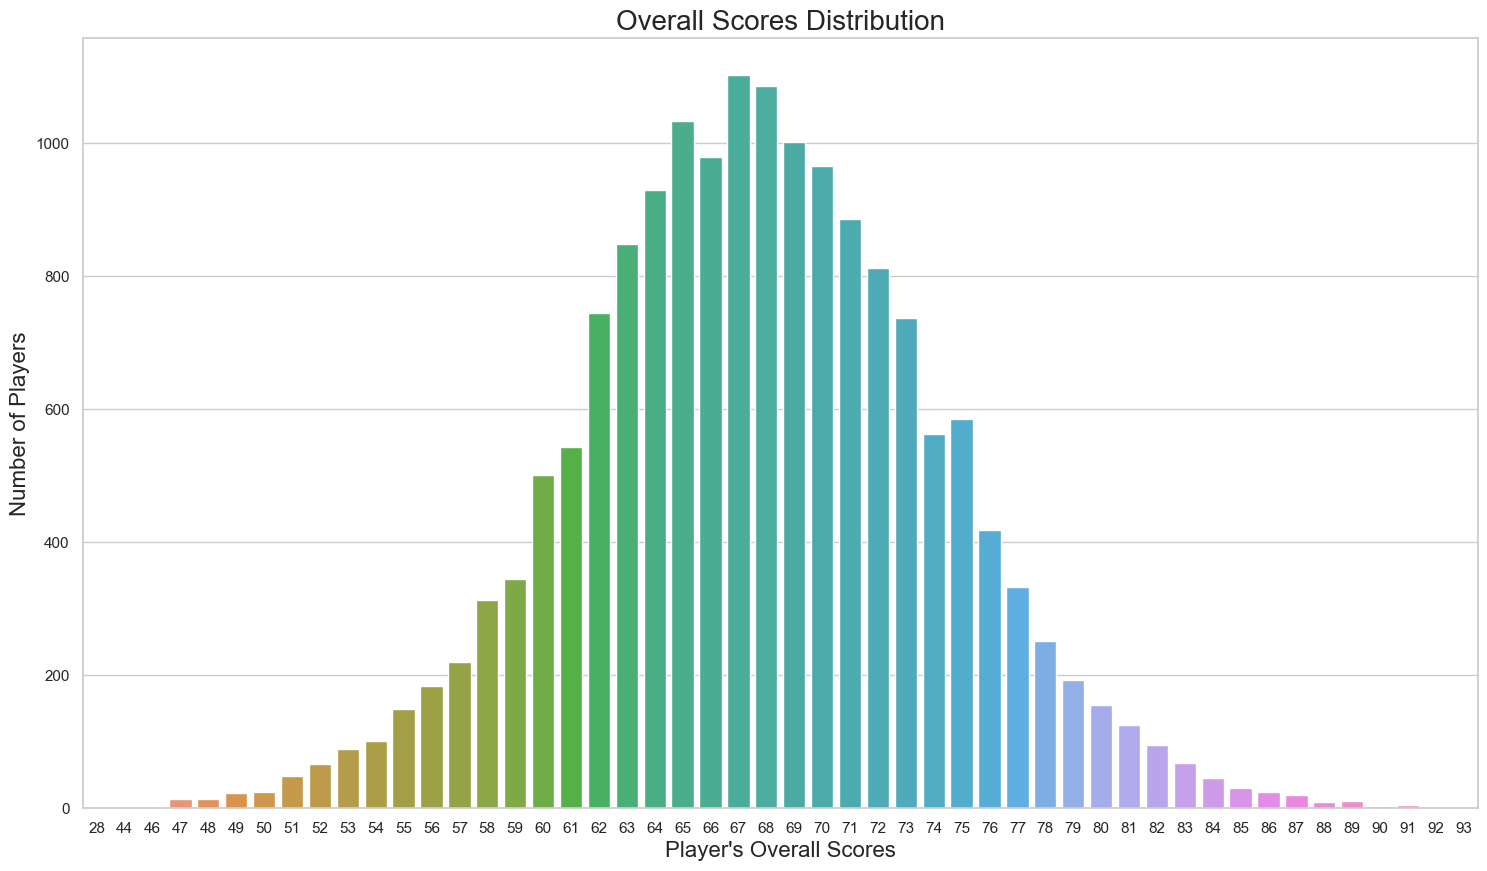

In [203]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='Overall', data=dataset)

# Customize labels and title
ax.set_xlabel(xlabel="Player's Overall Scores", fontsize=16)
ax.set_ylabel(ylabel='Number of Players', fontsize=16)
ax.set_title(label='Overall Scores Distribution', fontsize=20)


# Show the plot
plt.show()

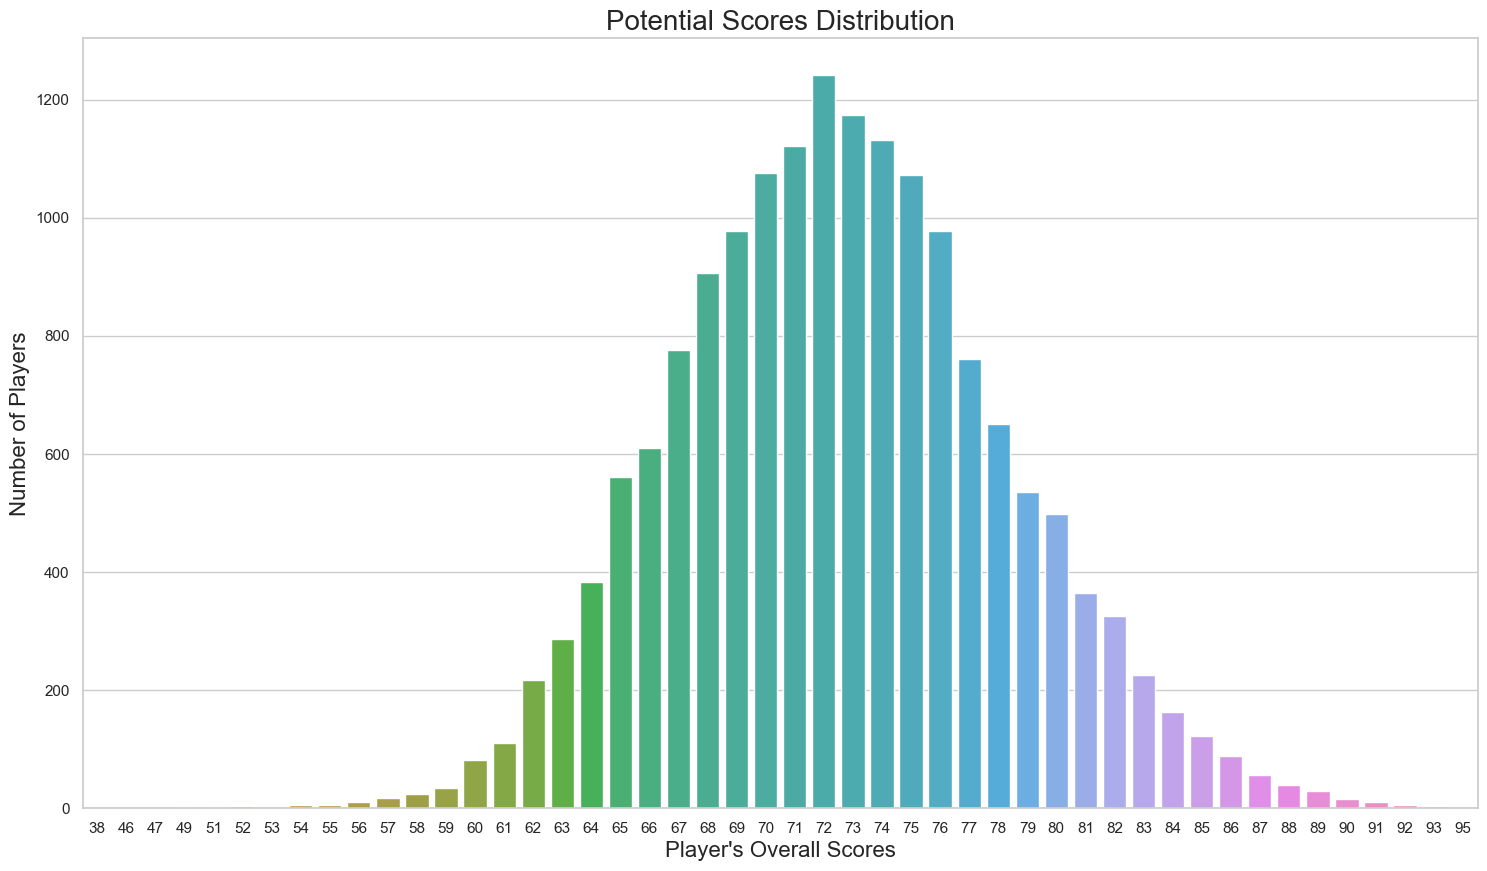

In [204]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='Potential', data=dataset)

# Customize labels and title
ax.set_xlabel(xlabel="Player's Overall Scores", fontsize=16)
ax.set_ylabel(ylabel='Number of Players', fontsize=16)
ax.set_title(label='Potential Scores Distribution', fontsize=20)


# Show the plot
plt.show()

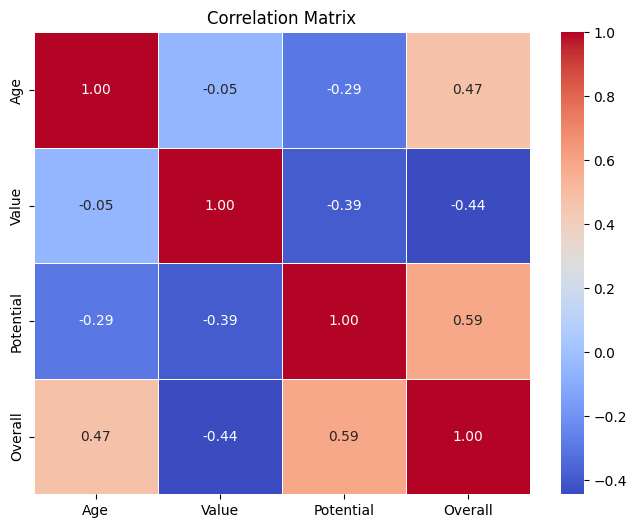

In [ ]:
corr_df = dataset[['Age','Value','Potential','Overall']].copy()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [212]:
#위에 있는 정답을 기반으로 하는 데이터프레임을 만들어주세요!
fifa_data_1 = dataset[['Nationality','Best Position','Overall']].copy()
print(fifa_data_1.head())
fifa_data_1.value_counts(fifa_data_1['Best Position'])



  Nationality Best Position  Overall
0    Portugal           CAM       88
1     Germany            CM       87
2     Uruguay            ST       88
3     Belgium            CM       91
4   Argentina            LB       84


Best Position
CB     3214
ST     2549
CAM    2203
GK     1546
RM     1313
CDM    1262
CM     1011
RB      856
LB      813
LM      745
RW      335
RWB     310
LWB     289
LW      182
CF       82
Name: count, dtype: int64

In [216]:
#CB, CM 전용 계산기 구현하기

def calculator_2(data, position):
    a = 10
    nationality = {}
    score = {}
    new_data = data[data['Best Position'] == position].sort_values(by = 'Overall', ascending = False)
    new_data = new_data.reset_index(drop=True)
    for i in range(len(new_data)):
        nationality[new_data['Nationality'][i]] = 1
        if nationality[new_data['Nationality'][i]] == 2:
            pass
        else:
            if new_data['Nationality'][i] in score:
                score[new_data['Nationality'][i]] += a
            else:
                score[new_data['Nationality'][i]] = a
                if nationality[new_data['Nationality'][i]] == 1:
                    nationality[new_data['Nationality'][i]] = 2 
                a -= 1
                if a ==0 :
                    break
    return score

CB_score = calculator_2(fifa_data_1, 'CB')
CM_score = calculator_2(fifa_data_1, 'CM')
print(CB_score)
print(CM_score)



{'Netherlands': 10, 'Spain': 15, 'Brazil': 8, 'Portugal': 7, 'Italy': 7, 'Slovakia': 5, 'France': 4, 'Germany': 3, 'Senegal': 2, 'Nigeria': 1}
{'Belgium': 11, 'Germany': 20, 'France': 8, 'Croatia': 7, 'Netherlands': 12, 'Italy': 11, 'Spain': 9, 'Serbia': 3, 'Austria': 2, 'Brazil': 1}


In [221]:
GK_score = calculator_2(fifa_data_1, 'GK')
LB_score = calculator_2(fifa_data_1, 'LB')
RB_score = calculator_2(fifa_data_1, 'RB')
LM_score = calculator_2(fifa_data_1, 'LM')
RM_score = calculator_2(fifa_data_1, 'RM')
CAM_score = calculator_2(fifa_data_1, 'CAM')
ST_score = calculator_2(fifa_data_1, 'ST')
CB_score = calculator_2(fifa_data_1, 'CB')
CM_score = calculator_2(fifa_data_1, 'CM')

df_dic = pd.DataFrame({'score' : [GK_score]})
positions = [LB_score, RB_score, LM_score, RM_score, CAM_score, ST_score, CM_score]
df_dic = pd.concat([df_dic] + [pd.DataFrame([pos]) for pos in positions], ignore_index=True)
print(df_dic)

                                               score  Scotland  Spain  \
0  {'Slovenia': 12, 'Germany': 21, 'Brazil': 14, ...       NaN    NaN   
1                                                NaN      10.0   18.0   
2                                                NaN       NaN   15.0   
3                                                NaN       NaN    6.0   
4                                                NaN       NaN    NaN   
5                                                NaN       NaN   24.0   
6                                                NaN       NaN    NaN   
7                                                NaN       NaN    9.0   

   Argentina  France  England  Portugal  Brazil  Canada  Uruguay  ...  \
0        NaN     NaN      NaN       NaN     NaN     NaN      NaN  ...   
1       11.0    15.0      6.0       5.0    11.0     3.0      2.0  ...   
2        NaN     NaN     24.0      15.0     2.0     NaN      NaN  ...   
3        NaN    15.0      NaN       2.0     5.0   